# Лабораторная работа 4
# Вариант №3

## Задание 1. Для своего варианта (данные приведены в конце лабораторной работы) с помощью MS Excel рассчитайте автокорреляционную функцию для 5 лагов и постройте график автокорреляционной функции. 

In [29]:
import random
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_series = [5.84, 5.92, 4.64, 4.77, 4.64, 6.38, 6.71, 7.47, 7.58, 6.47, 5.42, 4.7, 5.08, 4.23, 4.03, 2.17, 3.61, 5.02, 5.79, 5.65, 5.91, 6.56, 6.31, 5.99, 3.93, 2.96, 2.98, 1.7, 3.26, 6.56, 8.26, 9.21, 7.08, 4.94, 2.9]

In [9]:
def get_auto_correlation_function(x: list = None, 
                                  lags: list = None):
    """
    
    :param x: рассматриваемый временной ряд
    :param lags: число лагов
    :return: автокорреляционная функция
    """
    mean = np.mean(x) # мат. ожидание
    var = np.var(x) # дисперсия
    xp = x - mean
    corr=[1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]
    return np.array(corr)

Получим значения автокорелляционной функции для 5 лагов

In [10]:
lags = range(5)
acf_values = get_auto_correlation_function(time_series, lags)

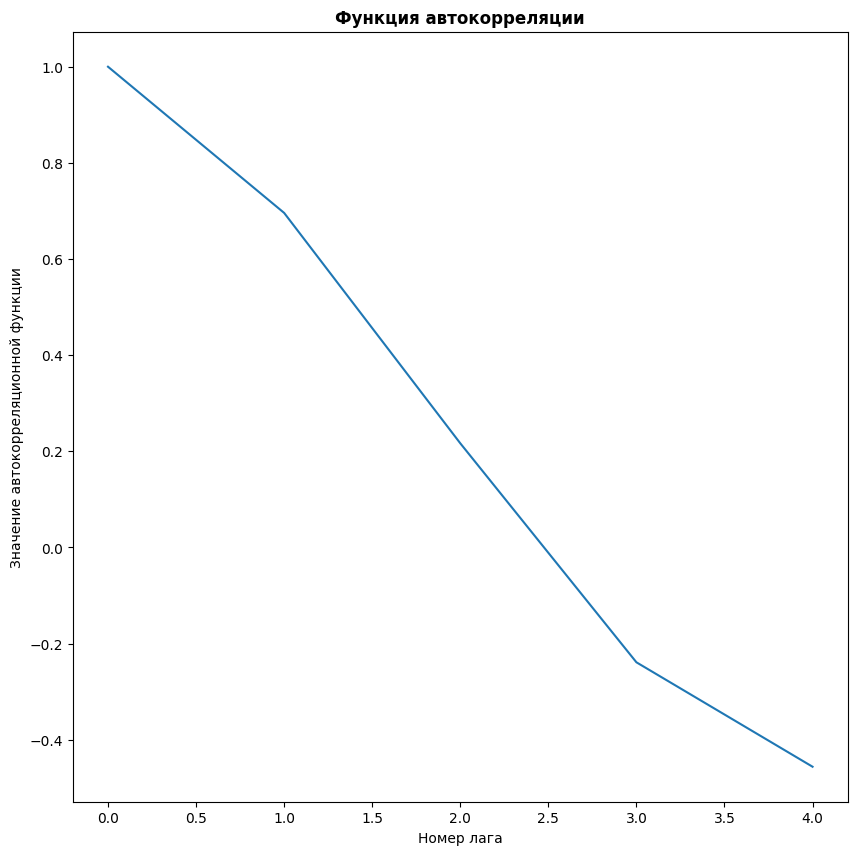

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(acf_values)
plt.xlabel(xlabel='Номер лага')
plt.ylabel(ylabel='Значение автокорреляционной функции')
plt.title(label='Функция автокорреляции', fontweight='bold')
plt.show()

##  Задание 2. Базовые модели временных рядов. Рассмотрите самостоятельно две базовые модели временных рядов: белый шум и случайное блуждание: опишите, какой процесс демонстрируют данные модели, какие параметры используются в этих моделях, как выглядят процессы, описываемый данными моделями на графиках.

Для начала рассмотрим белый шум

Зададим "белый шум" с мат. ожиданием, равным 0, и среднеквадратичным отклонением, равным 1

In [13]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

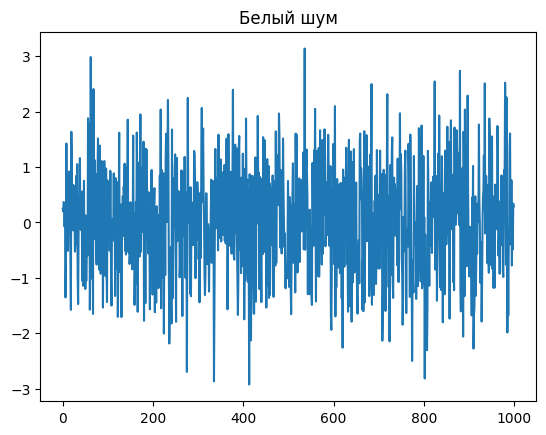

In [26]:
plt.plot(samples)
plt.title('Белый шум')
plt.show()

Теперь рассмотрим случайное блуждание

In [23]:
def get_random_walk_values(position: int | float,
                           steps: int = None):
    walk = [position]
    for i in range(steps):
        step = 1 if random.randint(0, 1) else -1
        position += step
        walk.append(position)
    return walk

In [24]:
position = 0
steps = 1000
random_walk = get_random_walk_values(position, steps)

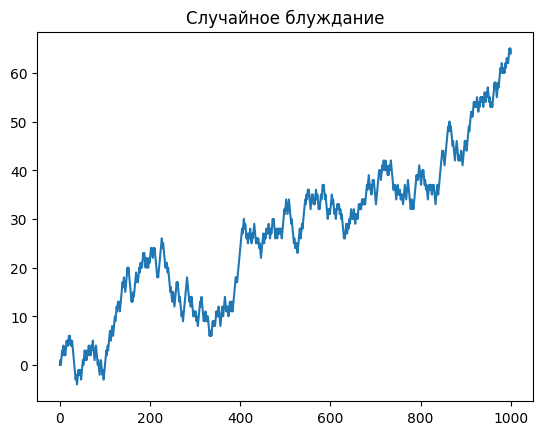

In [28]:
plt.plot(random_walk)
plt.title('Случайное блуждание')
plt.show()

"Белый" шум представляет собой стационарный временной ряд, так как это случайный процесс, т.е. ряд независимых
одинаково распределенных случайных величин с нулевым математическим ожиданием и постоянной дисперсией. В качестве параметров "белого шума" выступают среднее значение и дисперсия. 

Случайное блуждание - это уже нестационарный процесс, поскольку влияние возмущения "белого шума" не затухает со временем. Также стоит сказать, что дисперсия такого процесса не будет константной. В качестве параметров случайного блуждания выступают начальное положение во времени, а также дисперсия "белого шума".

## Задание 3. Является ли временной ряд, заданный авторегрессионным разностным уравнением, стационарным? Задание выполняется полностью (без вариантов). 

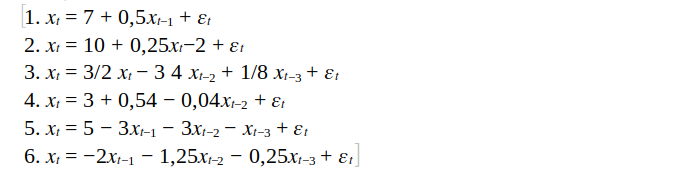

In [32]:
# display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 18-15-18.png")

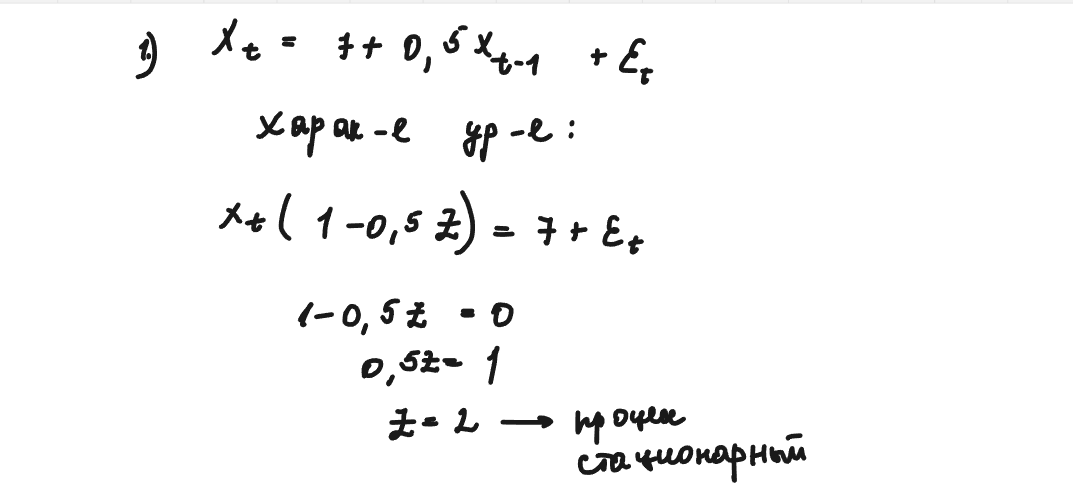

In [44]:
display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 19-31-23.png")

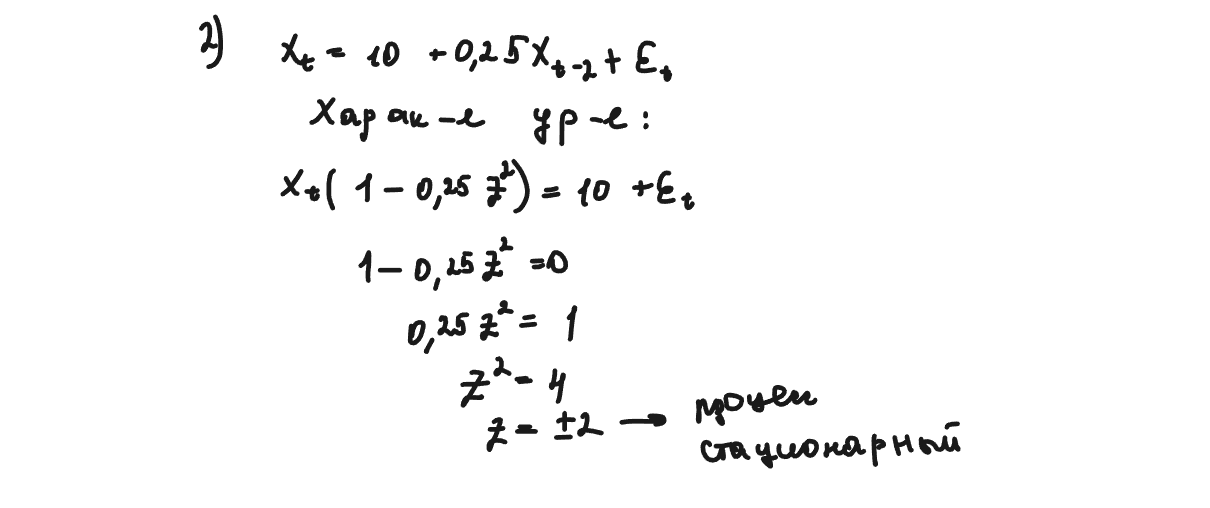

In [45]:
display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 19-31-27.png")

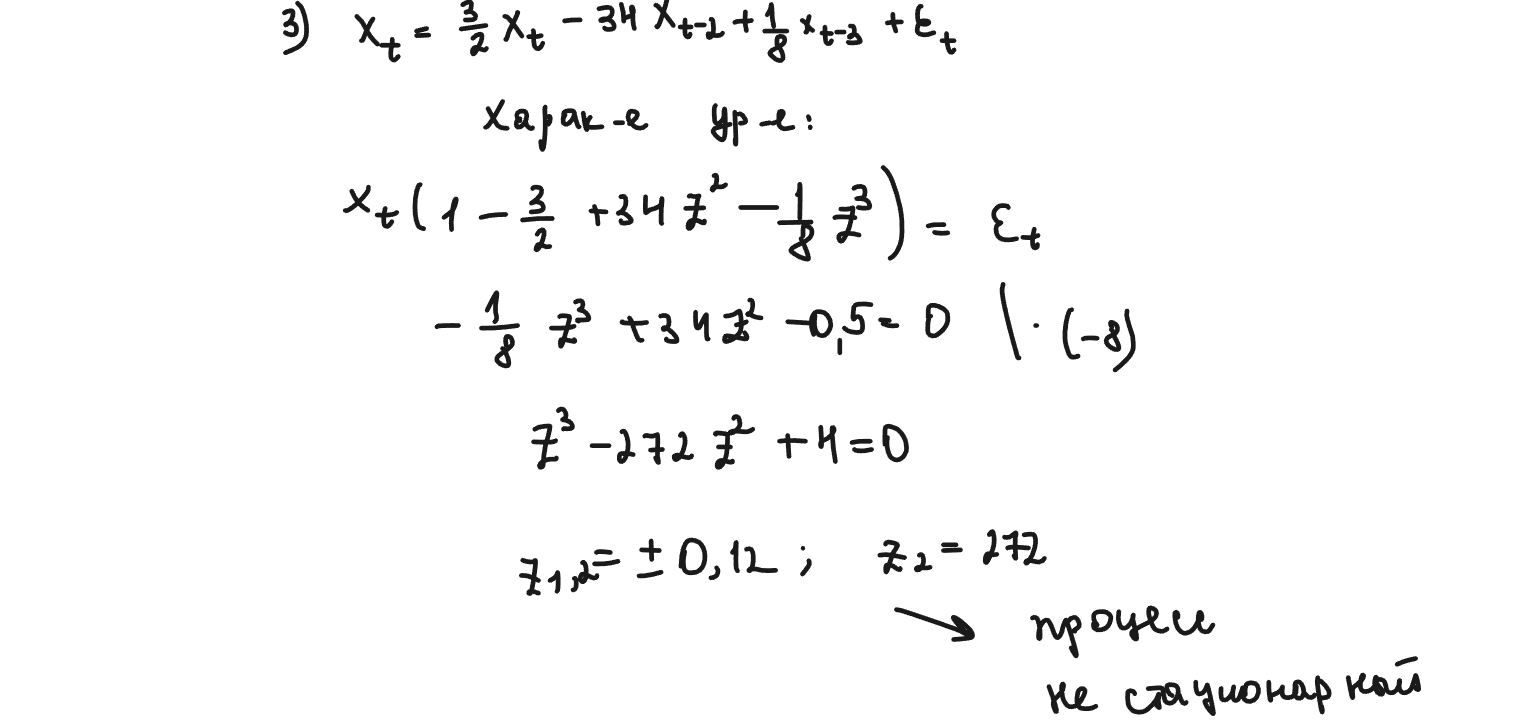

In [46]:
display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 19-31-32.png")

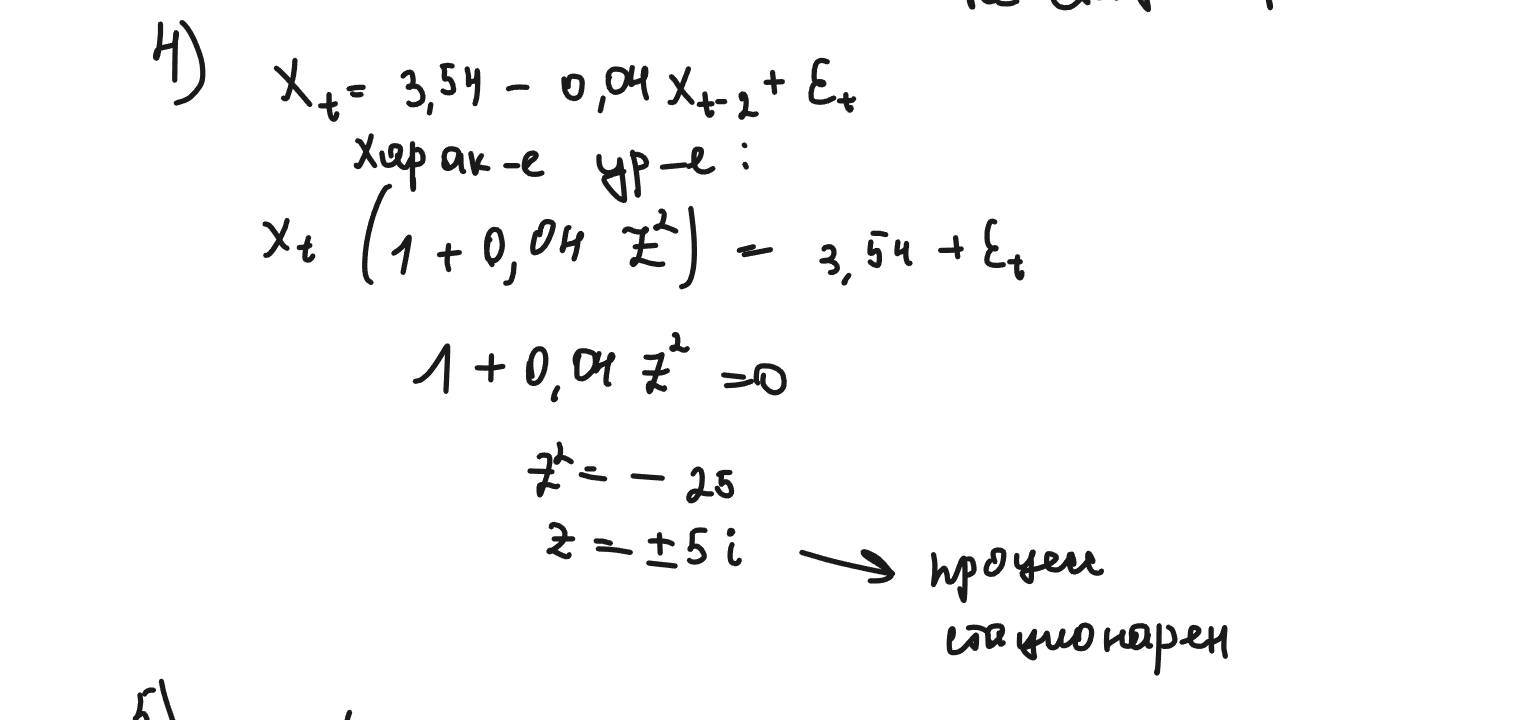

In [47]:
display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 19-31-37.png")

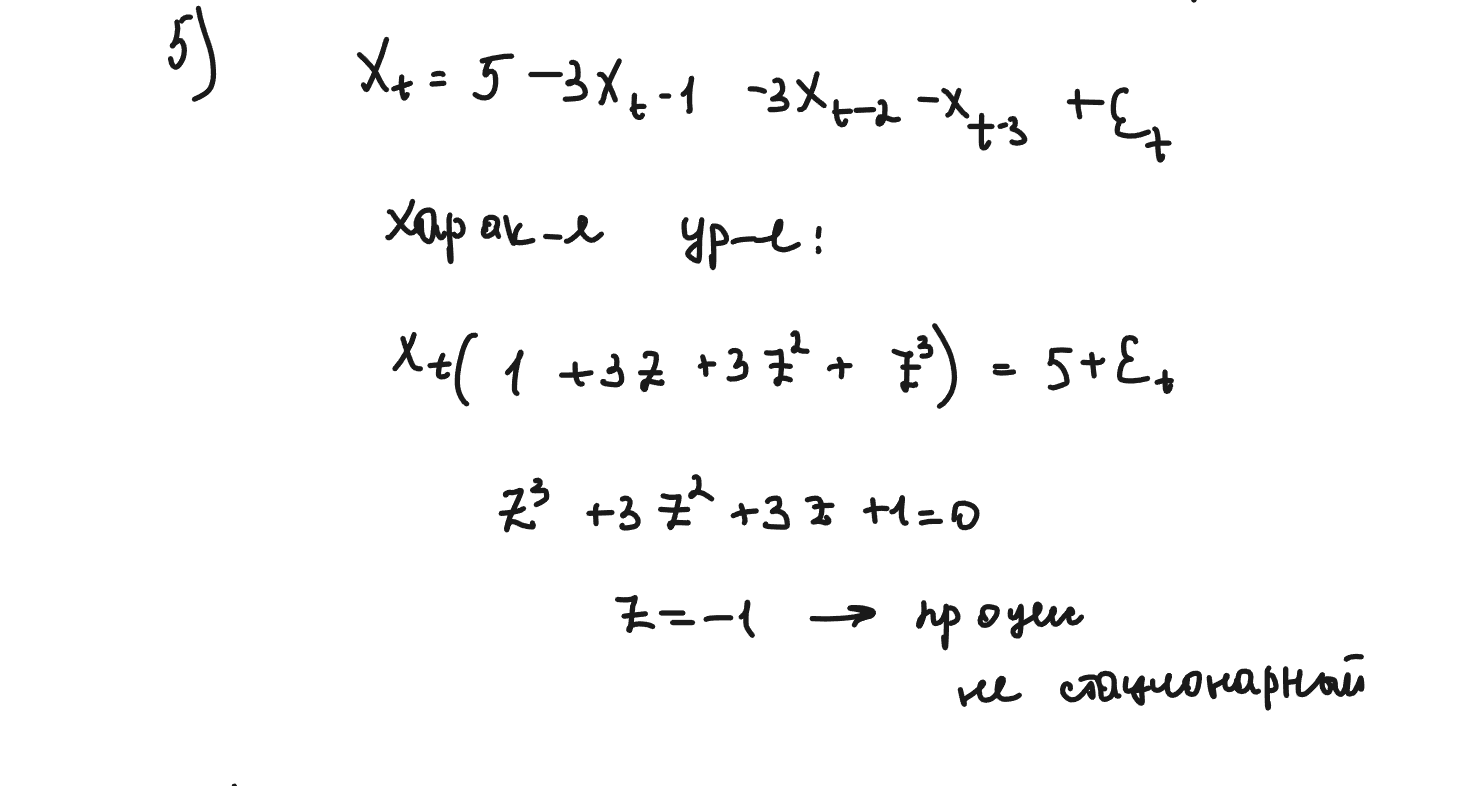

In [48]:
display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 19-31-41.png")

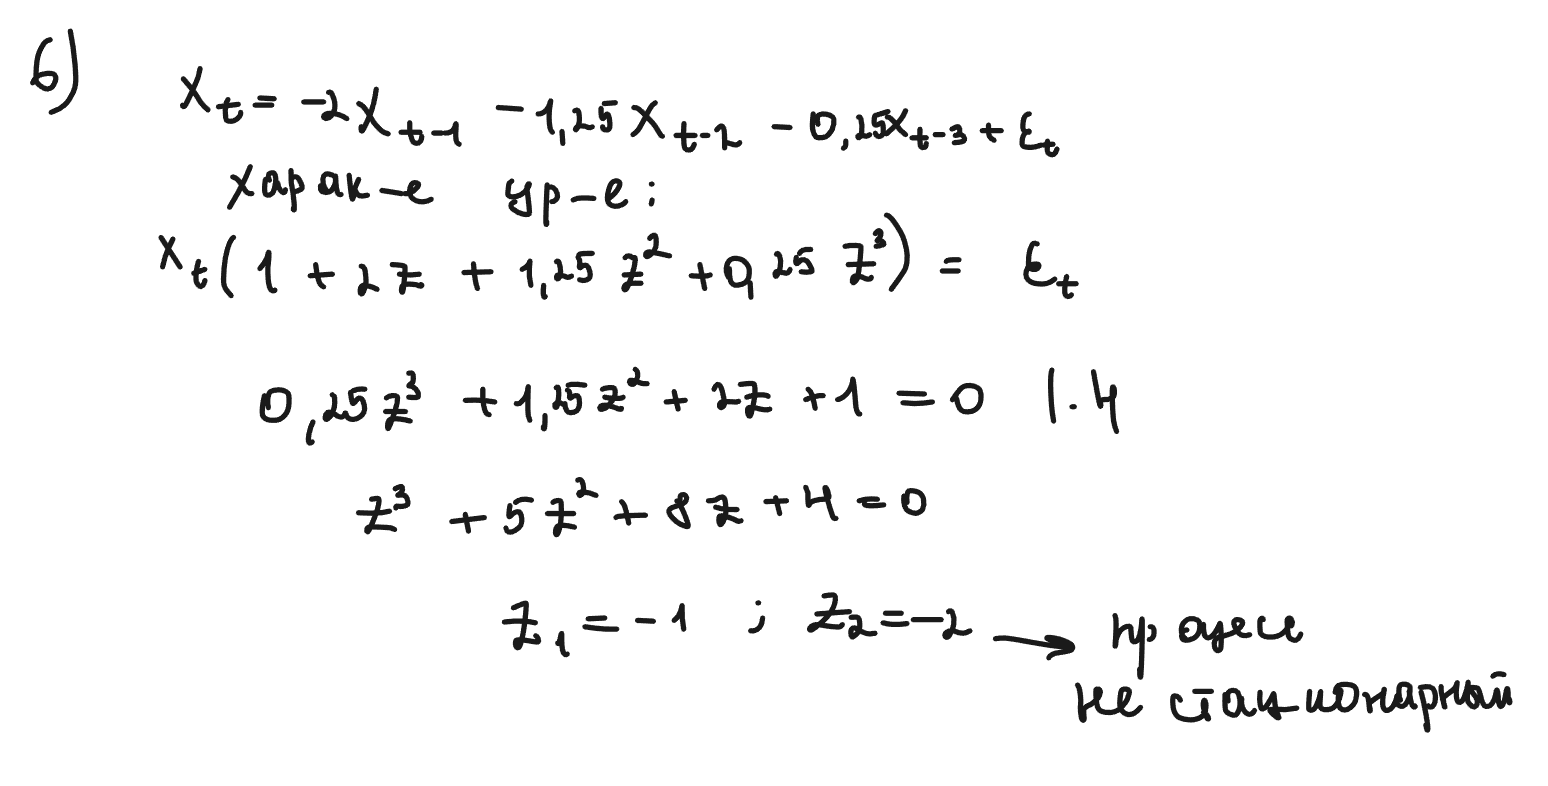

In [49]:
display.Image("/home/eugene/Pictures/Screenshots/Screenshot from 2024-05-03 19-31-47.png")

## Задание 4. Построение авторегрессионной модели Для временного ряда, соответствующего вашему варианту, оцените модели AR(1), AR(2) и AR(3). Используя информационные критерии, выберете одну из этих моделей и проверьте выполняется ли условие отсутствия автокорреляции остатков.

In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [99]:
train_data, test_data = time_series[:30], time_series[30:] # Разделим исходные данные на тренировочную и тестовую выборки

In [66]:
lag_order = 1 # Adjust this based on the ACF plot
ar_model_1 = ARIMA(train_data, order=(1, 0, 0)) # AR(1)
ar_model_2 = ARIMA(train_data, order=(2, 0, 0)) # AR(1)
ar_model_3 = ARIMA(train_data, order=(3, 0, 0)) # AR(3)

Обучим модели авторегрессии на тренировочных данных

In [67]:
ar_results_1 = ar_model_1.fit()

In [68]:
ar_results_2 = ar_model_2.fit()

In [69]:
ar_results_3 = ar_model_3.fit()

Посмотрим на коэффициенты полученных авторегрессионных моделей

In [84]:
dict(zip(ar_results_1.param_names, ar_results_1.params))

{'const': 5.225954694547259,
 'ar.L1': 0.6978313429514491,
 'sigma2': 1.104111813529595}

In [85]:
dict(zip(ar_results_2.param_names, ar_results_2.params))

{'const': 5.218695529218861,
 'ar.L1': 1.079606337004869,
 'ar.L2': -0.49330211080700653,
 'sigma2': 0.8755544225800962}

In [86]:
dict(zip(ar_results_3.param_names, ar_results_3.params))

{'const': 5.258440519353811,
 'ar.L1': 0.9814736855025551,
 'ar.L2': -0.20072352330602022,
 'ar.L3': -0.2922657746970074,
 'sigma2': 0.8081119158694723}

In [90]:
predict_ar_1 = ar_results_1.forecast(steps=5)

In [92]:
predict_ar_2 = ar_results_2.forecast(steps=5)

In [93]:
predict_ar_3 = ar_results_3.forecast(steps=5)

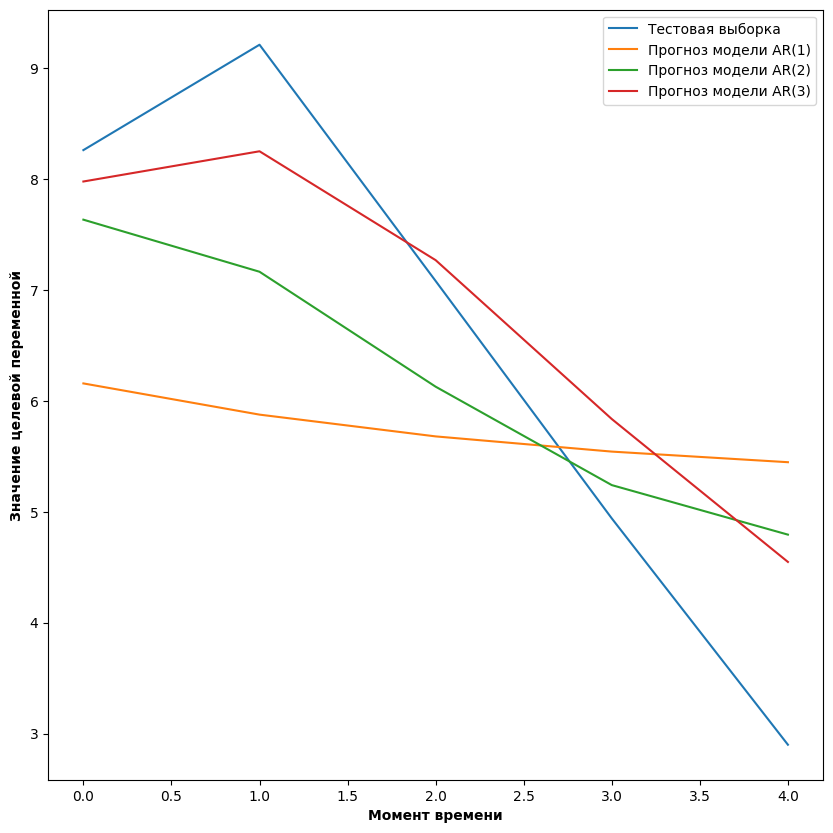

In [101]:
plt.figure(figsize=(10, 10))
plt.plot(test_data, label='Тестовая выборка')
plt.plot(predict_ar_1, label='Прогноз модели AR(1)')
plt.plot(predict_ar_2, label='Прогноз модели AR(2)')
plt.plot(predict_ar_3, label='Прогноз модели AR(3)')
plt.xlabel(xlabel='Момент времени', fontweight='bold')
plt.ylabel(ylabel='Значение целевой переменной', fontweight='bold')
plt.legend()
plt.show()